# Worksheet

# Checking Assumptions

## Quantiles

The 50% quantile of $\mathcal{N}(0, \sigma^2)$ is 0 because 50% of the values are below 0.

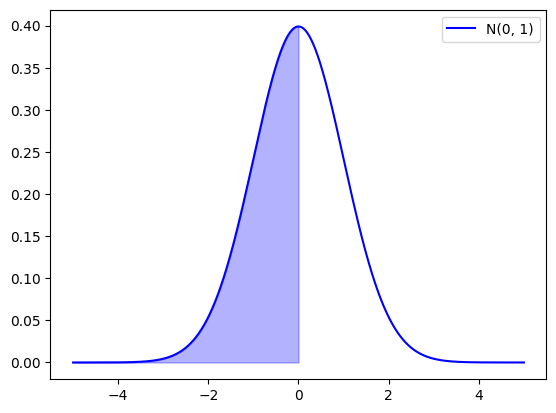

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

xs = np.linspace(-5,5,1000)
xs_upto = np.linspace(-5,0,1000)
fig, ax = plt.subplots()
ax.plot(xs, norm.pdf(xs, 0, 1), color='blue', label='N(0, 1)')
ax.fill_between(xs_upto, norm.pdf(xs_upto, 0, 1), color='blue', alpha=0.3)
ax.legend()
plt.show()


a) What is the 25% quantile of the $\mathcal{N}(0, 1)$?

In [2]:
def theoretical_quantile(q, mu, sigma):
    d = 3
    epsilon = .001
    delta = 1 * 10 ** (-d)
    i = -5
    while i < 5:
        i += epsilon
        val = norm.cdf(i, mu, sigma)
        if abs(q - val) < delta:
            return round(i, ndigits=d-1)
    ValueError("couldn't find anything")

print(theoretical_quantile(.25, 0, 1))

-0.68


b) What is the 25% quantile of the following sample from a $\mathcal{N}(0, 1)$?

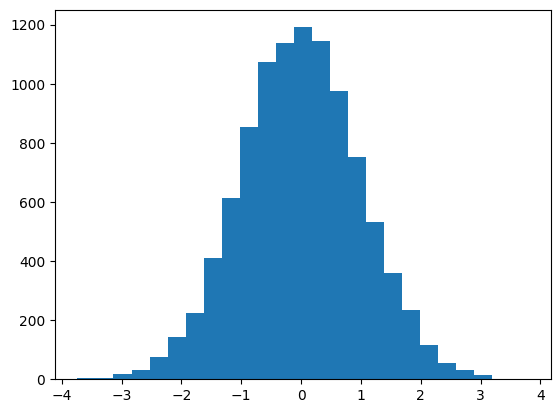

-0.6850954591197612


In [3]:
SAMPLE_SIZE = 10000

sample = norm.rvs(0, 1, size=SAMPLE_SIZE)

fig, ax = plt.subplots()
ax.hist(sample, bins=25)
plt.show()

def sample_quantile(q, sample):
    sorted_sample = np.sort(sample)
    count = 0
    for i in range(len(sorted_sample)):
        count += 1
        if count / len(sample) >= q :
            return sorted_sample[i]
    raise ValueError("unable to find quantile")

print(sample_quantile(.25, sample))

c) Create a scatter plot where the x axis has the theoretical quantiles from the normal distribution and the y axis has the sample quantiles from the data above. You can plot every tenth quantile to keep things simple.

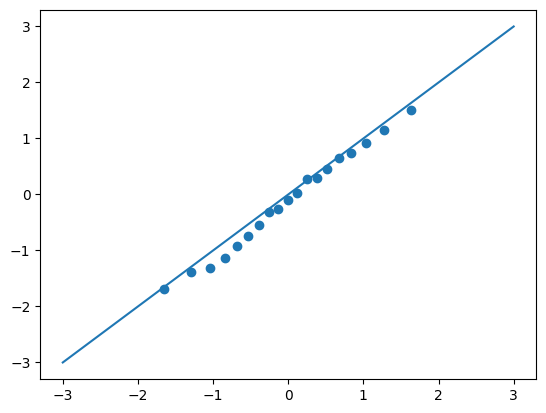

In [ ]:
NUM_QUANT = 20
quants = [x / NUM_QUANT for x in range(1, NUM_QUANT)]

theory_quants = [theoretical_quantile(x, 0, 1) for x in quants]
sample_quants = [sample_quantile(x, sample) for x in quants]

xs = np.linspace(-3,3,1000)
fig, ax = plt.subplots()
ax.scatter(..., ...)
ax.plot(xs, xs)
plt.show()

Recall, in linear regression we assume that $Y = X\beta + \epsilon$ where $\epsilon \sim \mathcal{N}(0, \sigma^2)$. $\epsilon = Y - X\beta$ but we can't just plot $\epsilon$ values to see if they follow a normal distribution because we don't know the true $\beta$ with which to multiply the X's in our dataset... Luckily, since $\hat\beta$ is an unbiased estimator of $\beta$ we can use $e = Y - X\hat\beta$ instead. These are called residuals and are estimates of $\epsilon$.

d) Describe how you would check that the normality assumption holds in the dataset you were given?

## Tricky examples

1. noise isn't exactly normal...

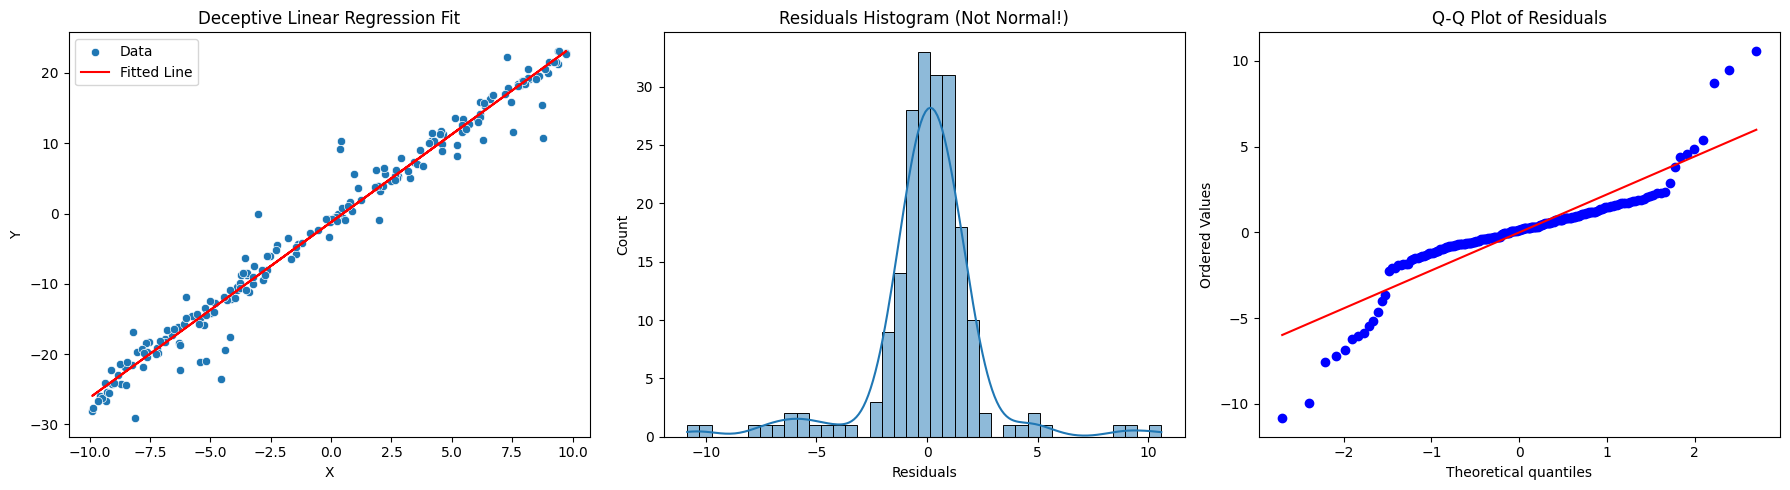

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(42)

# Generate X uniformly
n_samples = 200
X = np.random.uniform(-10, 10, n_samples)

# True relationship
true_slope = 2.5
true_intercept = -1.0
y_true = true_slope * X + true_intercept

# Create deceptive-looking noise: mixture of Gaussians
def mixture_noise(size):
    # 80% from N(0, 1), 20% from N(0, 5)
    mix = np.random.rand(size)
    noise = np.where(mix < 0.8, 
                     np.random.normal(0, 1, size), 
                     np.random.normal(0, 5, size))
    return noise

# Generate Y with non-normal noise
noise = mixture_noise(n_samples)
Y = y_true + noise

# Fit linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
Y_pred = slope * X + intercept
residuals = Y - Y_pred

# Plot the data
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X, y=Y, label='Data')
plt.plot(X, Y_pred, color='red', label='Fitted Line')
plt.title("Deceptive Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Residuals distribution
plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True)
plt.title("Residuals Histogram (Not Normal!)")
plt.xlabel("Residuals")

plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

2. noise isn't noise at all it's a missing variable / feature.

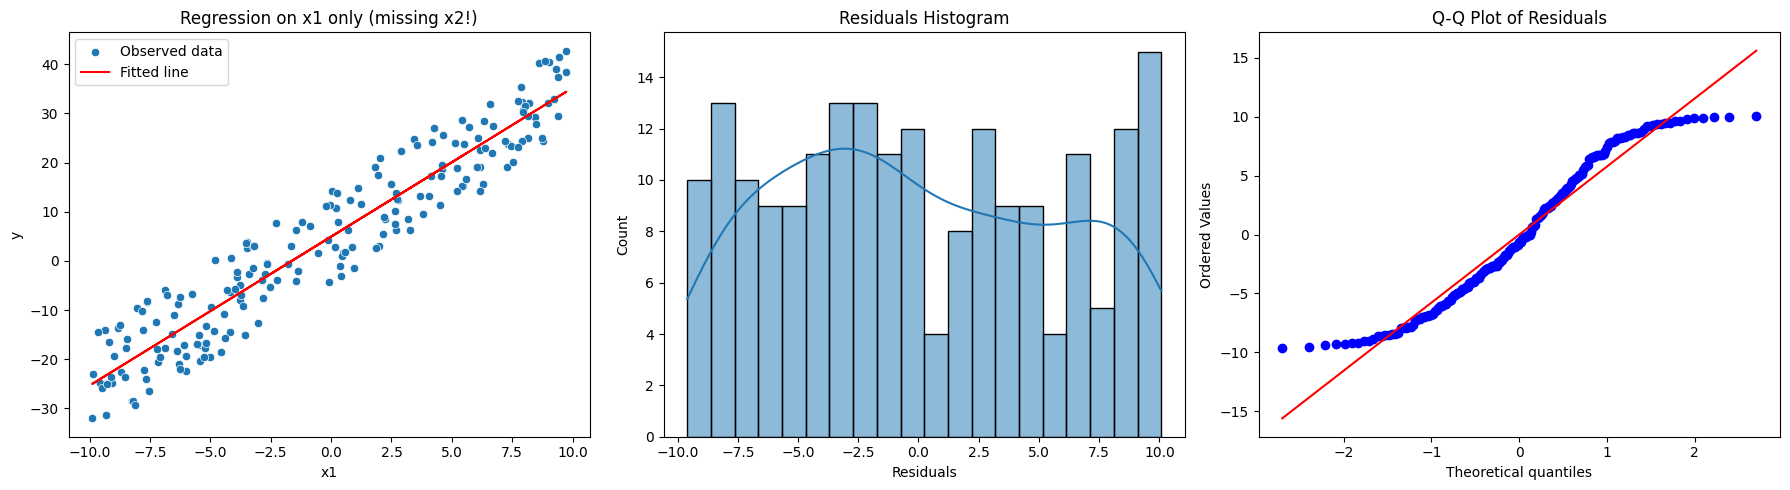

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(42)

# Number of samples
n_samples = 200

# Two true features
x1 = np.random.uniform(-10, 10, n_samples)
x2 = np.random.uniform(-5, 5, n_samples)

# True model: y depends on both x1 and x2
beta1 = 3.0
beta2 = -2.0
intercept = 5.0

y = intercept + beta1 * x1 + beta2 * x2

# We pretend we only see x1
# So we fit a simple linear regression: y ~ x1
slope, intercept_hat, r_value, p_value, std_err = stats.linregress(x1, y)
y_pred = slope * x1 + intercept_hat
residuals = y - y_pred

# Plot
plt.figure(figsize=(18, 5))

# Scatterplot
plt.subplot(1, 3, 1)
sns.scatterplot(x=x1, y=y, label='Observed data')
plt.plot(x1, y_pred, color='red', label='Fitted line')
plt.title("Regression on x1 only (missing x2!)")
plt.xlabel("x1")
plt.ylabel("y")
plt.legend()

# Residual histogram
plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True, bins=20)
plt.title("Residuals Histogram")
plt.xlabel("Residuals")

# Q-Q plot
plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

In [10]:
from PIL import Image as im

def snap(i):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of the true data points
    ax.scatter(x1, x2, y, color='blue', alpha=0.6, label='Data points')

    # Create a grid to plot the true plane
    x1_grid, x2_grid = np.meshgrid(np.linspace(-10, 10, 30), np.linspace(-5, 5, 30))
    y_grid = intercept + beta1 * x1_grid + beta2 * x2_grid

    # Plot the plane
    ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.4, color='red', label='True plane')

    # Labels and view
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title('True Relationship: y = 5 + 3*x1 - 2*x2')
    ax.view_init(elev=0 + i, azim=50 - i)  # Adjust angle for better visibility

    fig.savefig('temp.png')
    plt.close()

    return im.fromarray(np.asarray(im.open('temp.png')))

images = []
for i in range(20):
    images.append(snap(i))

images[0].save(
        'true_function.gif',
        optimize=False,
        save_all=True,
        append_images=images[1:],
        loop=0,
        duration=200,
    )

## More subtle assumption: constant variance

Another, maybe more subtle assumption, is that the variance of the errors is constant (i.e. it does not depend on the value of X). Below are examples of datasets generated with and without constant variance.

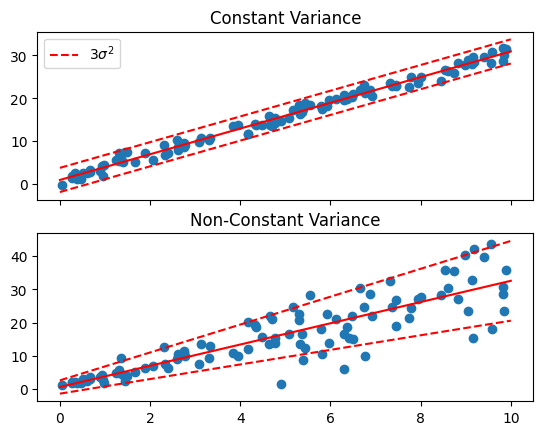

In [ ]:
def standard_error(ytrue, ypred):
    return (sum((ytrue - ypred)**2) / (len(ytrue) - 2)) ** (1/2)

x = 0 + 10.0 * np.random.random(SAMPLE_SIZE)
y = 1 + 3 * x + np.random.randn(SAMPLE_SIZE)
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta = np.linalg.inv(X.T @ X) @ X.T @ y
s = standard_error(y, X @ beta)

xs = np.linspace(0,10,1000)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.scatter(x, y)
ax1.plot(xs, beta[0] + beta[1] * xs, color='red')
ax1.plot(xs, 3 * s ** 2 + beta[0] + beta[1] * xs, c='r', linestyle='dashed', label='$3\sigma^2$')
ax1.plot(xs, - 3 * s ** 2 + beta[0] + beta[1] * xs, c='r', linestyle='dashed')
ax1.set_title("Constant Variance")
ax1.legend()

y1 = 1 + 3 * x + x * np.random.randn(SAMPLE_SIZE)
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta1 = np.linalg.inv(X.T @ X) @ X.T @ y1
s = standard_error(y1, X @ beta1)

space = 2
ax2.scatter(x, y1)
ax2.plot(xs, beta1[0] + beta1[1] * xs, color='red')
ax2.plot(xs, space + xs + beta1[0] + beta1[1] * xs, c='r', linestyle='dashed')
ax2.plot(xs, - space - xs + beta1[0] + beta1[1] * xs, c='r', linestyle='dashed')
ax2.set_title("Non-Constant Variance")

plt.show()

While we can easily inspect these plots to check for constant variance, this is only because we have 2-dimensional data that we can actually visualize. In practice, there may be any number of features / explanatory variables so we need a different way to check this assumption. Recall the residuals should follow a normal distribution with constant variance. These residuals are always 1-dimensional since $e = Y - X \hat \beta$. But we can't plot wrt X since X is multi-dimensional. So the next best thing is to plot wrt $X \hat \beta$.

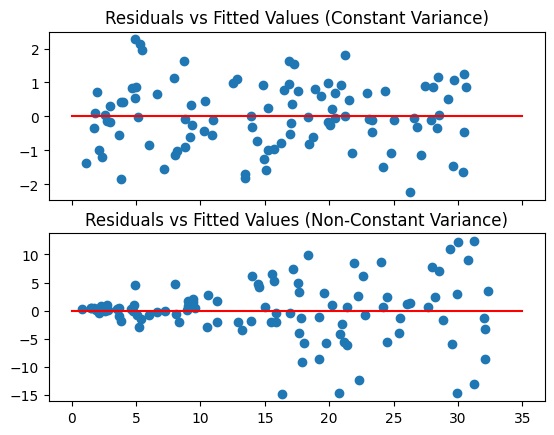

In [ ]:
xs = np.linspace(0, 35,1000)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.scatter(X @ beta, y - X @ beta)
ax1.plot(xs, np.zeros_like(xs), color='red')
ax1.set_title("Residuals vs Fitted Values (Constant Variance)")

ax2.scatter(X @ beta1, y1 - X @ beta1)
ax2.plot(xs, np.zeros_like(xs), c='r')
ax2.set_title("Residuals vs Fitted Values (Non-Constant Variance)")
plt.show()

Non-constant variance is bad because it means the uncertainty of our prediction depends on what we are trying to predict. For example above if x is close to 0 then we will be closer to the true y than if x is closer to say 10.

If we run into non-constant variance in practice, we may be able to transform Y to lessen the 

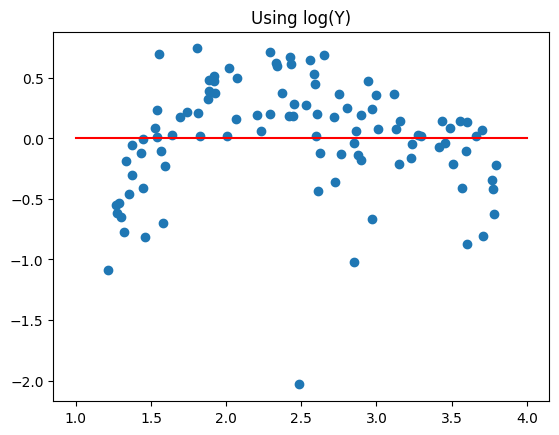

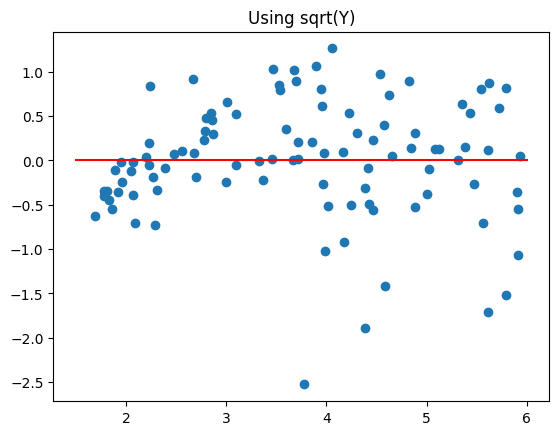

In [ ]:
xs = np.linspace(1, 4, 1000)
fig, ax = plt.subplots()
new_beta = np.linalg.inv(X.T @ X) @ X.T @ np.log(y1)
ax.scatter(X @ new_beta, np.log(y1) - X @ new_beta)
ax.plot(xs, np.zeros_like(xs), c='r')
ax.set_title("Using log(Y)")
plt.show()

xs = np.linspace(1.5, 6, 1000)
fig, ax = plt.subplots()
new_beta = np.linalg.inv(X.T @ X) @ X.T @ np.sqrt(y1)
ax.scatter(X @ new_beta, np.sqrt(y1) - X @ new_beta)
ax.plot(xs, np.zeros_like(xs), c='r')
ax.set_title("Using sqrt(Y)")
plt.show()


## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9947933480333289
0.9948429966148702
0.9948547149572349
0.9949364541137954
0.9952231638350366
0.9952937934897301
0.9952952444022111
0.9953020057928872
0.9953037996993866
0.9955054773989606
0.9957678240985377
0.9957965830665215
0.9958726071505405
0.9958937999026107
